
# Projet:  Rendez-vous d'Hopitaux Manqués 

<i>Auteur: Franck Alain Binde Koube</i>

### Base de données utilisée: Database_No_show_appointments

## Table des matières
<ul>
<li><a href="#intro">I - Introduction</a></li>
<li><a href="#questions">II - Questions</a></li>
<li><a href="#wrangling">III - Préparation des données</a></li>
<li><a href="#eda">IV - Analyse exploratoire des données</a></li>
<li><a href="#conclusions">V - Conclusions</a></li>
</ul>

<a id='intro'></a>
## I - Introduction

Dans ce projet, nous analyserons les données concernant des rendez-vous de patients dans des centres hospitaliers au Brésil. 

Chaque observation (ou ligne) nous donne les détails sur un rendez-vous en particulier. Pour chaque rendez-vous, des atributs spécifiques sont répertoriés. 

Les différentes colonnes présentes dans la table de données sont:
<ul>
    <li><b>PatientId</b>: Identifiant unique du patient</li>
    <li><b>AppointmentID</b>: Identifiant unique du rendez-vous</li>
    <li><b>Gender</b>: Sexe du patient</li>
    <li><b>ScheduledDay</b>: Jour et heure du rendez-vous</li>
    <li><b>AppointmentDay</b>: Jour du rendez-vous</li>
    <li><b>Age</b>: Age du patient</li>
    <li><b>Neighbourhood</b>: Localisation du centre hospitalier</li>
    <li><b>Scholarship</b>: Indique si le patient est inscrit au programme d'aide sociale brésilienne Bolsa Familia.</li>
    <li><b>Hipertension</b>: Indique si le patient est atteint d'hypertension</li>
    <li><b>Diabetes</b>: Indique si le patient est atteint de diabete</li>
    <li><b>Alcoholism</b>: Indique si le patient est atteint d'alcoolisme</li>
    <li><b>Handcap</b>: Indique si le patient souffre d'un handicap</li>
    <li><b>SMS_received</b>: Indique si le patient a reçu un ou plusieurs messages</li>
    <li><b>No-show</b>: Indique si le patient s'est présenté au rendez-vous</li>  
</ul>
Vous pouvez consulter la source de ces données <a href="https://www.kaggle.com/joniarroba/noshowappointments" target="_blank">ici</a>.

<img src="https://images.unsplash.com/photo-1536064479547-7ee40b74b807?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80" width="500"/>



<a id='questions'></a>
## II - Questions

Une telle base de données soulève quelques questions.
<ol>
    <li>Comment est la distribution de l'âge des patients?</li>
    <li>Les patients d'un certain âge manquent t-ils plus leur rendez-vous ?</li>
    <li>Quelles sont les localisations où les proportions de rendez-vous manqués sont les plus élevées?</li>
    <li>Y a-t-il des jours de la semaine où les rendez-vous sont le plus manqués ?</li>
    <li>Qu’en est-il des heures de rendez-vous ?</li>
    <li>Les patients qui ont reçu des messages viennent t-ils plus à leur rendez-vous?</li>
</ol> 

<a id='wrangling'></a>
## III - Préparation des données


### Propriétés Générales 
Nous allons télécharger nos données et les nettoyer. Cette première étape consiste à assainir nos données pour pouvoir faciliter notre analyse. Ainsi, nous pourrons :
- Supprimer les doublons 
- Traiter les valeur manquantes 
- Traiter les valeur aberrantes
- Modifier le type de données de certaines colonnes
- Modifier certains noms de colonnes
- Créer de nouvelles colonnes


In [1]:
# Importons les librairies dont nous avons besoin

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

Importons notre table de données, et explorons la.

In [2]:
df = pd.read_csv('noshowappointments-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

<b>Déterminons la dimension de notre table de données</b> 🢃

In [3]:
df.shape

(110527, 14)

Nombre de lignes: <b>110527</b><br />
Nombre de colonnes: <b>14</b>

Vérifions s'il y a des doublons.

In [4]:
print("Nombre de doublons:")
print(df.duplicated().sum())

Nombre de doublons:
0


Notre tableau de données ne contient pas de doublons. Continuons notre inspection

<b>Inspectons les colonnes</b> 🢃

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<h3>Quelques observations</h3>
<p>▶ Il n'y <b>aucune valeur manquante</b> dans nos données.</p>
<p>▶ Les colonnes <i>PatientId</i> et <i>AppointmentID</i> sont de types numérique. Vu qu'aucun calcul statistique ne se fera sur ces valeurs, nous les convertirons en type string (objet sur pandas)</p>
<p>▶ Les colonnes <i>ScheduledDay</i> et <i>AppointmentDay</i> sont de type objet. Nous les convertirons en type date pour pouvoir mieux les manipuler.</p>

### Modification du type de données des colonnes

In [6]:
# Création de la fontion qui permettra de modifier le type de données des colonnes

def change_col_type(col):
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].astype(str)
    elif df[col].dtype == 'object':
        df[col] = pd.to_datetime(df[col])

Modification du type de données des colonnes

In [7]:
cols = ['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay']
for col in cols:
    change_col_type(col)

Vérifions que nos modifications ont bien fonctionné

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

La modification a fonctionné. <i>PatientId</i> et <i>AppointmentID</i> sont maintenant de type objet. <i>ScheduledDay</i> et <i>AppointmentDay</i> sont de type date. Nous avons donc les types de données souhaités.

Inspectons la colonne No-show

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

> La colonne <i>No-show</i> contient deux valeurs: "Yes" et "No". La valeur "Yes" signifie qu'un patient a manqué son rendez-vous.<br />
<b>No-show = "Yes"</b>: Rendez-vous manqué<br />
<b>No-show = "No"</b>: Rendez-vous honoré

> Cette colonne est binaire (Yes - No). Pour gagner en temps et bénéficier de la puissance des fonctions numériques de numpy et pandas, nous convertirons cette colonne en colonne numérique. Pour ce faire, nous remplacerons d'abord les valeurs "Yes" par "1", et "No" par 0.

Remplacement des valeurs

In [10]:
df['No-show'] = np.where(df['No-show'] == "Yes", 1, 0)
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [11]:
# Modification du type de données
df['No-show'] = df['No-show'].astype(int)
df['No-show'].dtypes

dtype('int32')

> <b>La colonne <i>No-show</i> ne contient maintenant que soit des 1, soit des 0. Elle est de type entier.</b>

> Remarque: Certaines fonctions de pandas (telles que **query**) n'autorisent pas des noms de colonnes qui contiennent des tirets(-). Nous allons donc modifier le nom de la colonne **No-show** par **No_show**

### Modification du nom de colonne

In [12]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)

Vérifions que tout s'est bien passé

In [13]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

### Statistiques de base
Maintenant que nos colonnes ont des types appropriés, nous pouvons inspecter quelques statistiques de base sur les valeurs numériques. 

In [14]:
print("Tableau statistique:")
df.describe()

Tableau statistique:


Age    Scholarship   Hipertension       Diabetes  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean       37.088874       0.098266       0.197246       0.071865   
std        23.110205       0.297675       0.397921       0.258265   
min        -1.000000       0.000000       0.000000       0.000000   
25%        18.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          Alcoholism        Handcap   SMS_received        No_show  
count  110527.000000  110527.000000  110527.000000  110527.000000  
mean        0.030400       0.022248       0.321026       0.201933  
std         0.171686       0.161543       0.466873       0.401444  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000       0.000000  
max         1.000000       4.000000       1.000000       1.000000

La moyenne de la colonne **No_show** est de **0.20**. Ce qui signifie qu'environ **20%** des rendez-vous de notre base de données **n'ont pas été honorés.** <br />
La colonne Age affiche <b>115</b> comme valeur maximale. Il s'agit probablement d'une valeur abberante. Utilisons un boxplot pour le confirmer ou pas.

<AxesSubplot:>

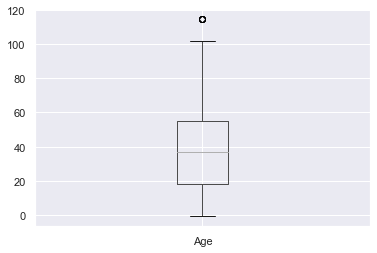

In [15]:
df.boxplot(column='Age')

Le graphique indique la valeur 115 pour la colonne Age comme valeur aberrante. Nous allons supprimer les lignes dans lesquelles cette valeur est présente.

In [16]:
index_drop = df.loc[df.Age == 115, :].index
df.drop(df.index[index_drop], inplace=True)

Utilisons de nouveau un boxplot pour vérifier le résultat.

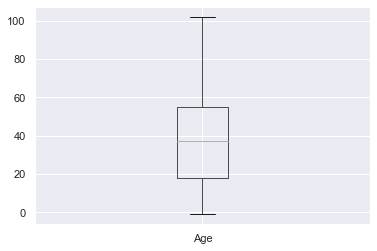

In [17]:
df.boxplot(column='Age');

Nous n'avons plus de valeurs aberrantes dans nos données.

### Création de nouvelles colonnes

> <hr/>
En introduction de ce projet, nous avons des questions relatives aux jours de la semaine et aux heures. En effet, nous aimerions savoir s'il y a des jours et des heures en particulier où les patients ont plus souvent manqué un rendez-vous. Nous allons donc créer deux nouvelles colonnes, à savoir:<br />
 
> <ul>
    <li>la colonne <b>Appointment_dow</b>: dans laquelle nous allons extraire le jour de la semaine à partir de la colonne <b>AppointmentDay</b></li>
    <li>la colonne <b>Appointment_hour</b>: dans laquelle nous allons extraire l'heure de début du rendez-vous à partir de la colonne <b>ScheduledDay</b></li>
</ul>

In [18]:
df['Appointment_dow'] = df['AppointmentDay'].dt.dayofweek
df['Appointment_hour'] = df['ScheduledDay'].dt.hour
df.head()

PatientId AppointmentID Gender              ScheduledDay  \
0   29872499824296.0       5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438.0       5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951.0       5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174.0       5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183.0       5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No_show  \
0             1         0           0        0             0        0   
1             0         0           0        0             0        0   
2             0         0           0        0             0        0   
3             0         0           0        0             0        0   
4             1         1           0        0             0        0   

   Appointment_dow  Appointment_hour  
0                4                18  
1                4                16  
2                4                16  
3                4                17  
4                4                16

Signification des valeurs de <b>Appointment_dow:</b>
<ul>
    <li><b>0: </b>Lundi</li>
    <li><b>1: </b>Mardi</li>
    <li><b>2: </b>Mercredi</li>
    <li><b>3: </b>Jeudi</li>
    <li><b>4: </b>Vendredi</li>
    <li><b>5: </b>Samedi</li>
    <li><b>6: </b>Dimanche</li>
</ul>

Nous allons remplacer les valeurs par defaut de la colonne <i>Appointment_dow</i> par les noms des jours de la semaine.

In [19]:
# On crée une série conditionnelle pour faire correspondre les numéros des jours de la semaine aux noms
dow = np.where(df.Appointment_dow == 0, "Monday", 
                         np.where(df.Appointment_dow == 1, "Tuesday",
                         np.where(df.Appointment_dow == 2, "Wednesday",
                         np.where(df.Appointment_dow == 3, "Thursday",
                         np.where(df.Appointment_dow == 4, "Friday",
                         np.where(df.Appointment_dow == 5, "Saturday", "Sunday"))))))

# On remplace la colonne actuelle par la série nouvellement créee
df['Appointment_dow'] = dow
df.head()

PatientId AppointmentID Gender              ScheduledDay  \
0   29872499824296.0       5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438.0       5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951.0       5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174.0       5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183.0       5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No_show  \
0             1         0           0        0             0        0   
1             0         0           0        0             0        0   
2             0         0           0        0             0        0   
3             0         0           0        0             0        0   
4             1         1           0        0             0        0   

  Appointment_dow  Appointment_hour  
0          Friday                18  
1          Friday                16  
2          Friday                16  
3          Friday                17  
4          Friday                16

Il sera aussi question de savoir si les patients d'un certain âge ont plus manqué leur rendez-vous. Nous allons donc créer la colonne **age_group** qui va diviser les patients en differents groupes en fonction de leur âge.

In [20]:
# création des valeurs limitrophes pour les groupes en fonction de l'âge
ages_bound = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 115]
# création des libellés de chaque groupe d'âge
ages_group = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']
# création de la nouvelle colonne age_group
df['age_group'] = pd.cut(df.Age, ages_bound, ages_group)
# vérification des resultats
df.head()

PatientId AppointmentID Gender              ScheduledDay  \
0   29872499824296.0       5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438.0       5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951.0       5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174.0       5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183.0       5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No_show  \
0             1         0           0        0             0        0   
1             0         0           0        0             0        0   
2             0         0           0        0             0        0   
3             0         0           0        0             0        0   
4             1         1           0        0             0        0   

  Appointment_dow  Appointment_hour age_group  
0          Friday                18  (60, 70]  
1          Friday                16  (50, 60]  
2          Friday                16  (60, 70]  
3          Friday                17   (0, 10]  
4          Friday                16  (50, 60]

Nous avons nettoyé nos données et crée de nouvelles colonnes. Nous pouvons à présent passer à une exploration plus appronfondie, dans le but de répondre à nos interrogations.
<h3></h3>
<hr>

<a id='eda'></a>
## IV - Analyse exploratoire des données

> Petit rappel sur les questions de base:

<ol>
    <li>Comment est la distribution de l'âge des patients de cette base de données ?</li>
    <li>Les patients d'un certain âge manquent t-ils plus leur rendez-vous ?</li>
    <li>Quelles sont les localisations où les proportions de rendez-vous manqués sont les plus élevées?</li>
    <li>Y a-t-il des jours de la semaine où les rendez-vous sont le plus manqués ?</li>
    <li>Qu’en est-il des heures de rendez-vous ?</li>
    <li>Les patients qui ont reçu des messages viennent t-ils plus à leur rendez-vous?</li>
</ol>  

### Question 1 : Comment est la distribution de l'âge des patients de cette base de données ?
<hr />

Nous allons générer un histogramme permettant de visualiser cette distribution.

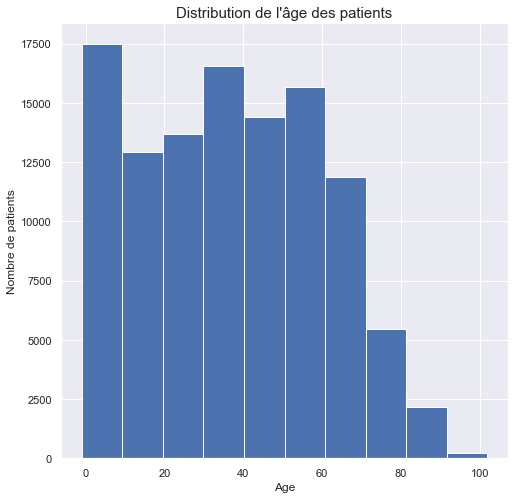

In [21]:
plt.figure(figsize=(8, 8))
plt.hist(df.Age)
plt.xlabel("Age")
plt.ylabel("Nombre de patients")
plt.title("Distribution de l'âge des patients", fontsize=15);

La grande majorité des rendez-vous sont pour des patients de moins de 11 ans. La distribution est légerement inclinée vers la droite. <br />
<hr>

### Question 2 : Les patients d'un certain âge manquent t-ils plus leur rendez-vous ?

Nous allons inspecter la <b>proportion des rendez-vous manqués par groupe d'âge</b>.

In [22]:
# on trouve le nombre TOTAL de rendez-vous pour chaque groupe
ages_group = df.groupby('age_group').count()
print("Nombre total de rendez-vous")
ages_group['AppointmentID']

Nombre total de rendez-vous


age_group
(0, 10]      15210
(10, 20]     13099
(20, 30]     13783
(30, 40]     15052
(40, 50]     14420
(50, 60]     15661
(60, 70]     11189
(70, 80]      5721
(80, 90]      2544
(90, 115]      303
Name: AppointmentID, dtype: int64

In [23]:
# on trouve le nombre de rendez-vous manqués pour chaque groupe
ages_group_not_show = df.query('No_show == 1').groupby('age_group').count()
print("Nombre de rendez-vous manqués pour chaque groupe")
ages_group_not_show['AppointmentID']

Nombre de rendez-vous manqués pour chaque groupe


age_group
(0, 10]      3149
(10, 20]     3308
(20, 30]     3394
(30, 40]     3232
(40, 50]     2870
(50, 60]     2721
(60, 70]     1648
(70, 80]      889
(80, 90]      407
(90, 115]      59
Name: AppointmentID, dtype: int64

In [24]:
# on trouve la proportion de rendez-vous manqués pour chaque groupe
prop_ages_group_not_show = ages_group_not_show.AppointmentID / ages_group.AppointmentID
print("Proportion de rendez-vous manqués pour chaque groupe")
prop_ages_group_not_show.sort_values(ascending=False)

Proportion de rendez-vous manqués pour chaque groupe


age_group
(10, 20]     0.252538
(20, 30]     0.246245
(30, 40]     0.214722
(0, 10]      0.207035
(40, 50]     0.199029
(90, 115]    0.194719
(50, 60]     0.173744
(80, 90]     0.159984
(70, 80]     0.155392
(60, 70]     0.147288
Name: AppointmentID, dtype: float64

<b>Visualisons ces proportions sur un graphe</b>

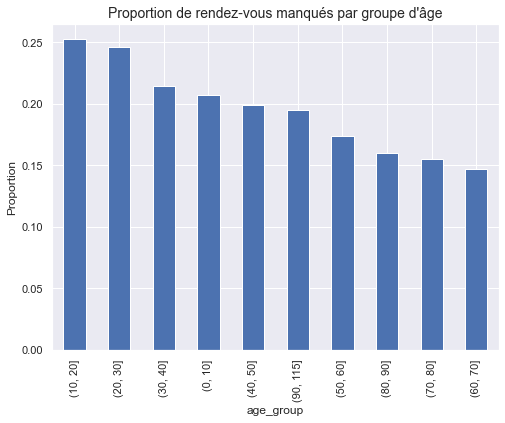

In [25]:
plt.figure(figsize=(8, 6))
prop_ages_group_not_show.sort_values(ascending=False).plot(kind='bar')
plt.title("Proportion de rendez-vous manqués par groupe d'âge", fontsize=14)
plt.ylabel("Proportion");

Les groupes de 10-20 ans et 20-30 ans sont ceux avec les plus grandes proportions de rendez-vous manqués avec:
<ul>
    <li><b>10-20 ans</b>: 25.3% de rendez-vous manqués</li>
    <li><b>20-30 ans</b>: 24.6% de rendez-vous manqués</li>
</ul>

### Question 3 : Quelles sont les localisations où les proportions de rendez-vous manqués sont les plus élevées? 
<hr>
Inspectons la colonne <i>Neighbourhood</i>. Déterminons le nombre de rendez-vous pour chaque localisation ainsi que les 10 localisations avec le moins de rendez-vous.

In [26]:
print("Nombre de rendez-vous")
df['Neighbourhood'].value_counts().sort_values().head(10)

Nombre de rendez-vous


PARQUE INDUSTRIAL                1
ILHAS OCEÂNICAS DE TRINDADE      2
AEROPORTO                        8
ILHA DO FRADE                   10
ILHA DO BOI                     35
PONTAL DE CAMBURI               69
MORADA DE CAMBURI               96
NAZARETH                       135
SEGURANÇA DO LAR               145
UNIVERSITÁRIO                  152
Name: Neighbourhood, dtype: int64

Certaines localisations n'ont que très peu de rendez-vous. Les inclure dans notre analyse ne serait pas judicieux. Nous allons nous concentrer sur les localisations avec plus de 200 rendez-vous. <br />
Mais d'abord, visualisons les 10 localisations avec le plus de rendez-vous.

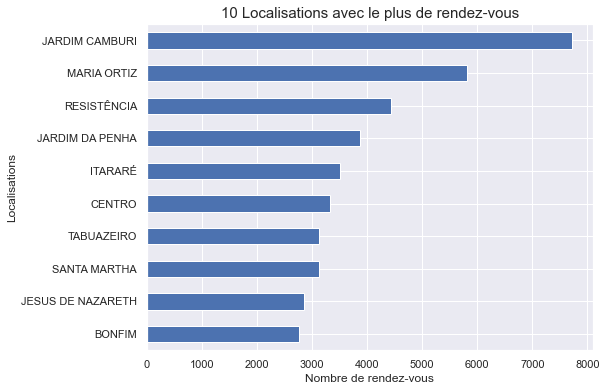

In [27]:
plt.figure(figsize=(8, 6))
df['Neighbourhood'].value_counts().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.ylabel("Localisations")
plt.xlabel("Nombre de rendez-vous")
plt.title("10 Localisations avec le plus de rendez-vous", fontsize=15);

In [28]:
# Déterminons les localisations qui ont plus de 200 rendez-vous
neighbourhood = df.groupby('Neighbourhood').count()
nbhood_mst_freqt = neighbourhood.loc[neighbourhood['AppointmentID'] >= 200, :]
nbhood_mst_freqt

PatientId  AppointmentID  Gender  ScheduledDay  \
Neighbourhood                                                         
ANDORINHAS                2258           2258    2258          2258   
ANTÔNIO HONÓRIO            271            271     271           271   
ARIOVALDO FAVALESSA        282            282     282           282   
BARRO VERMELHO             423            423     423           423   
BELA VISTA                1907           1907    1907          1907   
...                        ...            ...     ...           ...   
SÃO CRISTÓVÃO             1836           1836    1836          1836   
SÃO JOSÉ                  1976           1976    1976          1976   
SÃO PEDRO                 2448           2448    2448          2448   
TABUAZEIRO                3132           3132    3132          3132   
VILA RUBIM                 851            851     851           851   

                     AppointmentDay   Age  Scholarship  Hipertension  \
Neighbourhood                                                          
ANDORINHAS                     2258  2258         2258          2258   
ANTÔNIO HONÓRIO                 271   271          271           271   
ARIOVALDO FAVALESSA             282   282          282           282   
BARRO VERMELHO                  423   423          423           423   
BELA VISTA                     1907  1907         1907          1907   
...                             ...   ...          ...           ...   
SÃO CRISTÓVÃO                  1836  1836         1836          1836   
SÃO JOSÉ                       1976  1976         1976          1976   
SÃO PEDRO                      2448  2448         2448          2448   
TABUAZEIRO                     3132  3132         3132          3132   
VILA RUBIM                      851   851          851           851   

                     Diabetes  Alcoholism  Handcap  SMS_received  No_show  \
Neighbourhood                                                               
ANDORINHAS               2258        2258     2258          2258     2258   
ANTÔNIO HONÓRIO           271         271      271           271      271   
ARIOVALDO FAVALESSA       282         282      282           282      282   
BARRO VERMELHO            423         423      423           423      423   
BELA VISTA               1907        1907     1907          1907     1907   
...                       ...         ...      ...           ...      ...   
SÃO CRISTÓVÃO            1836        1836     1836          1836     1836   
SÃO JOSÉ                 1976        1976     1976          1976     1976   
SÃO PEDRO                2448        2448     2448          2448     2448   
TABUAZEIRO               3132        3132     3132          3132     3132   
VILA RUBIM                851         851      851           851      851   

                     Appointment_dow  Appointment_hour  age_group  
Neighbourhood                                                      
ANDORINHAS                      2258              2258       2191  
ANTÔNIO HONÓRIO                  271               271        257  
ARIOVALDO FAVALESSA              282               282        268  
BARRO VERMELHO                   423               423        418  
BELA VISTA                      1907              1907       1834  
...                              ...               ...        ...  
SÃO CRISTÓVÃO                   1836              1836       1785  
SÃO JOSÉ                        1976              1976       1867  
SÃO PEDRO                       2448              2448       2346  
TABUAZEIRO                      3132              3132       3019  
VILA RUBIM                       851               851        829  

[69 rows x 16 columns]

In [29]:
# Stockons le nom de ces localisations
nbhood_sup_200_names = nbhood_mst_freqt.index
nbhood_sup_200_names

Index(['ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA',
       'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM',
       'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO',
       'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO',
       'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE',
       'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA',
       'GURIGICA', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
       'ILHA DO PRÍNCIPE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA',
       'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'NOVA PALESTINA', 'PARQUE MOSCOSO', 'PIEDADE',
       'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA',
       'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'SANTA MARTHA', 'SANTA TEREZA', 'SANTO ANDRÉ',
       '

Nous allons ensuite créer une série qui contient:
<ul>
    <li>En index: les localisations avec plus de 200 rendez-vous</li>
    <li>En valeur: le nombre total de rendez-vous</li>
</ul>
Ceci nous permettra de determiner la <b>proportion</b> des rendez-vous manqués pour les localisations de plus de 200 rendez-vous.

In [30]:
# Creation de la série nbhood_sup_200
nbhood_sup_200 = nbhood_mst_freqt['AppointmentID']
nbhood_sup_200

Neighbourhood
ANDORINHAS             2258
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
BELA VISTA             1907
                       ... 
SÃO CRISTÓVÃO          1836
SÃO JOSÉ               1976
SÃO PEDRO              2448
TABUAZEIRO             3132
VILA RUBIM              851
Name: AppointmentID, Length: 69, dtype: int64

Pour ces localisations, nous allons déterminer le nombre de rendez-vous manqués. Ceci nous permettra de trouver la proportion de rendez-vous manqués, en divisant le nombre de rendez-vous manqués par le nombre total de rendez-vous pour chacune des localisations concernées.

In [31]:
"""
# Filtrons nos données en fonction de deux critères
# Critère 1: Les rendez-vous manqués
# Critère 2: Les locations ont plus de 200 rendez-vous
"""
nbhood_no_show = df.query('No_show == 1 & Neighbourhood in @nbhood_sup_200_names')
# Déterminons le nombre de rendez-vous manqués pour chacune des localisations
nbhood_no_show = nbhood_no_show.groupby('Neighbourhood').count()['AppointmentID']
print("Nombre de rendez-vous manqués")
nbhood_no_show

Nombre de rendez-vous manqués


Neighbourhood
ANDORINHAS             518
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
BELA VISTA             384
                      ... 
SÃO CRISTÓVÃO          363
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
VILA RUBIM             141
Name: AppointmentID, Length: 69, dtype: int64

<b>Finalement, calculons la proportion de rendez-vous manqués pour ces localisations</b>

In [32]:
prop_rdv_manq_loc = (nbhood_no_show / nbhood_sup_200).sort_values(ascending=False)
print("Proportion de rendez-vous manqués")
prop_rdv_manq_loc

Proportion de rendez-vous manqués


Neighbourhood
SANTOS DUMONT        0.289185
SANTA CECÍLIA        0.274554
SANTA CLARA          0.264822
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
                       ...   
SANTA MARTHA         0.158416
DO CABRAL            0.157143
DE LOURDES           0.154098
SOLON BORGES         0.147122
MÁRIO CYPRESTE       0.145553
Name: AppointmentID, Length: 69, dtype: float64

<b>SANTOS DUMONT</b> apparait comme étant la localisation avec le plus grand pourcentage de rendez-vous manqué (28,9%). Visualisons les 5 localisations où ce pourcentage est le plus élevé.

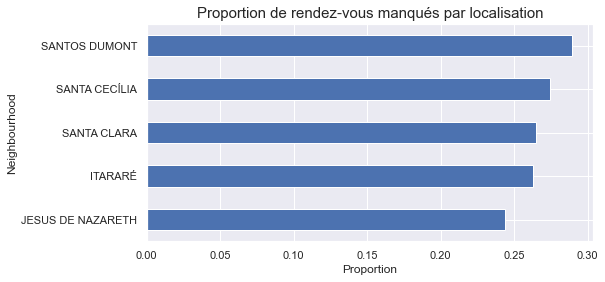

In [33]:
plt.figure(figsize=(8, 4))
prop_rdv_manq_loc.sort_values(ascending=False).head(5).sort_values().plot(kind='barh')
plt.xlabel("Proportion")
plt.title("Proportion de rendez-vous manqués par localisation", fontsize=15);

Les 5 localisations avec le plus grand pourcentage de rendez-vous manqués sont:
<ol>
    <li><b>SANTOS DUMONT: </b>28.9%</li>
    <li><b>SANTA CECÍLIA : </b>27.5%</li>
    <li><b>SANTA CLARA: </b>26.5%</li>
    <li><b>ITARARÉ: </b>26.3%</li>
    <li><b>JESUS DE NAZARETH: </b>24.4%</li>
</ol>
<hr>

### Question 4 : Y a-t-il des jours de la semaine où les rendez-vous sont le plus manqués ?
<hr>

> Voici comment nous procèderons. Nous allons d'abord utiliser le jour de la semaine pour grouper nos données. Nous calculerons le nombre total de rendez-vous pour chaque jour de la semaine. Ensuite, nous calculerons le nombre total de rendez-vous manqués pour chacun de ces jours. Nous serons ainsi en mesure de déterminer la proportion de rendez-vous manqués pour chaque jour de la semaine.<br />
Pour éviter la repetition, nous allons créer la fonction <i>calc_prop</i> qui génèrera ces proportions pour nous.

In [34]:
# Fonction permettant de déterminer la proportion de rendez-vous manqués d'une colonne de données
def calc_prop_miss(col): 
    
    # On détermine le nombre total de rendez-vous pour un groupe donné
    total_grp = df.groupby(col).count()['AppointmentID']
    # On détermine le nombre de rendez-vous manqués pour ce meme groupe
    miss_grp = df.query('No_show == 1').groupby(col).count()['AppointmentID']
    # On génère la proportion de rendez-vous manqués
    return miss_grp / total_grp

<b>Caculons la proportion de rendez-vous manqués pour chaque jour de la semaine (jours inclus dans la base de données)</b>

In [35]:
print("Proportion de rendez-vous manqués")
dow_no_show_prop = calc_prop_miss('Appointment_dow')
dow_noshow_prop_sorted = dow_no_show_prop.sort_values(ascending=False)
dow_noshow_prop_sorted

Proportion de rendez-vous manqués


Appointment_dow
Saturday     0.230769
Friday       0.212273
Monday       0.206446
Tuesday      0.200936
Wednesday    0.196892
Thursday     0.193447
Name: AppointmentID, dtype: float64

Utilisons un graphique poiur mieux visualiser le tableau ci-dessus.

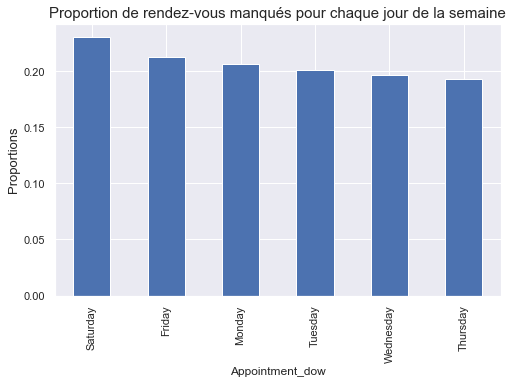

In [36]:
plt.figure(figsize=(8, 5))
dow_noshow_prop_sorted.plot(kind="bar")
plt.ylabel("Proportions", fontsize = 13)
plt.title("Proportion de rendez-vous manqués pour chaque jour de la semaine", fontsize = 15);

La journée du <b>samedi</b> est celle avec le plus grand pourcentage de rendez-vous manqués (23%). Mais les autres jours ont des pourcentages qui ne sont pas vraiment éloignés. Comme par exemple vendredi(21%) et lundi(20%).
<hr/>

### Question 5 : Qu’en est-il des heures de rendez-vous ?

Nous allons reproduire l'opération précédente, en nous concentrant cette fois-ci sur les heures de rendez-vous.

In [37]:
# Calculons la proportion de rendez-vous manqués pour chaque heure de rendez-vous
hr_noshow_prop = calc_prop_miss('Appointment_hour')
hr_noshow_prop_sorted =hr_noshow_prop.sort_values(ascending=False)
print("Proportion de rendez-vous manqués")
hr_noshow_prop_sorted

Proportion de rendez-vous manqués


Appointment_hour
21    0.333333
20    0.300000
17    0.248195
16    0.237640
19    0.233607
15    0.231836
11    0.227842
14    0.226715
10    0.220695
18    0.212687
13    0.209274
12    0.203615
9     0.196880
6     0.192015
8     0.182683
7     0.151520
Name: AppointmentID, dtype: float64

Visualisons cela via un graphique.

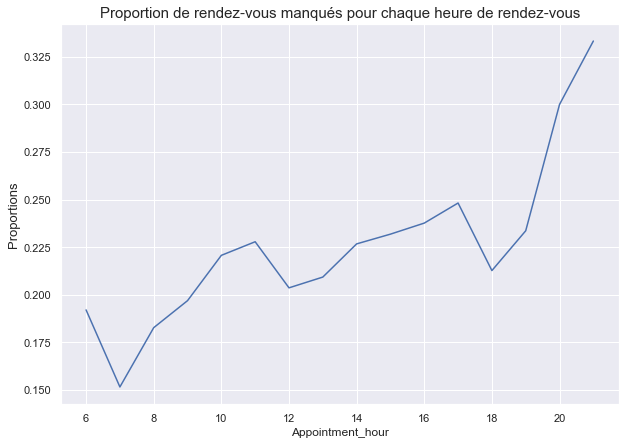

In [38]:
plt.figure(figsize=(10, 7))
hr_noshow_prop.plot(kind="line")
plt.ylabel("Proportions", fontsize = 13)
plt.title("Proportion de rendez-vous manqués pour chaque heure de rendez-vous", fontsize = 15);

<ul>
    <li>On observe un pic en terme de pourcentage de rendez-vous manqués pour <b>20h et 21h</b> (30 et 33% respectivement)</li>
    <li>Les plus faibles pourcentages de rendez-vous manqués concernent les heures très matinales <b>(entre 6h et 9h)</b></li>
</ul>

### Question 6 : Les patients qui ont reçu des messages viennent t-ils plus à leur rendez-vous?

Regroupons les patients en deux groupes:
- Groupe 1: Ceux qui ont reçu un ou plusieurs messages
- Groupe 2: Ce qui n'ont pas reçu de messages

In [39]:
# Apres regroupement, observons comment varient les proportions de chaque attribut
df.groupby('SMS_received').mean()

Age  Scholarship  Hipertension  Diabetes  Alcoholism  \
SMS_received                                                               
0             36.883797     0.098026      0.198971  0.074453    0.033488   
1             37.511626     0.098785      0.193597  0.066402    0.023872   

               Handcap   No_show  Appointment_hour  
SMS_received                                        
0             0.024880  0.167002         10.641156  
1             0.016572  0.275753         11.056735

<h3> Patients avec messages </h3>
<hr/>
- <b>28%</b> des patients <b>qui ont reçu des messages</b> <b>ne sont pas venus</b> au rendez-vous. En d'autres termes, <b>72%</b> des patients <b>qui ont reçu des messages</b><b> sont venus</b> au rendez-vous.<br/>
Un grand pourcentage de patients qui ont reçu des messages sont venus au rendez-vous. Pour avoir une meilleure idée de l'impact des messages, posons nous maitenant cette question:

Quel pourcentage des personnes n'ayant pas reçu de messages sont venus au rendez-vous?

<h3> Patients sans messages </h3>
<hr/>
D'après le tableau précedent:<br/>
- <b>17%</b> des patients qui n'ont pas reçu de messages<b> ne sont pas venus</b> au rendez-vous. En d'autres termes, <b>83%</b> des patients qui n'ont pas reçu de messages <b>sont venus</b> au rendez-vous.


Ainsi:
- <b>72%</b> des patients qui ont reçu des messages<b> sont venus</b> au rendez-vous.
- <b>83%</b> des patients qui n'ont pas reçu de messages <b>sont venus</b> au rendez-vous.

Il <b>se pourrait</b> que les messages aient un impact sur le fait de se présenter ou pas au rendez-vous. En effet, ceux qui viennent au rendez-vous <b>sans messages</b> représentent un plus grand pourcentage que ce qui viennent au rendez-vous <b>avec</b> messages (83% contre 72%). Il s'agit d'une observation, qui nécessitera des investigations futures.

<a id='conclusions'></a>
## V - Conclusions

Après l'exploration et la visualisation des données précédentes, les observations suivantes ont été faites.

<b>Par rapport à l'âge  des patients:</b><br/>

Les groupes de patients de 10-20 ans et 20-30 ans sont ceux avec les plus grandes proportions de rendez-vous manqués avec:
<ul>
    <li><b>10-20 ans</b>: 25.3% de rendez-vous manqués</li>
    <li><b>20-30 ans</b>: 24.6% de rendez-vous manqués</li>
</ul>

<b>En ce qui concerne les localisations des hopitaux:</b><br/>

Les 5 localisations avec le plus grand pourcentage de rendez-vous manqués sont:
<ol>
    <li><b>SANTOS DUMONT: </b>28.9% de rdv manqués</li>
    <li><b>SANTA CECÍLIA : </b>27.5%</li>
    <li><b>SANTA CLARA: </b>26.5%</li>
    <li><b>ITARARÉ: </b>26.3%</li>
    <li><b>JESUS DE NAZARETH: </b>24.4%</li>
</ol>
<b>Par rapport aux jours de la semaine:</b><br/>

La journée du <b>samedi</b> est celle avec le plus grand pourcentage de rendez-vous manqués (23%). Mais les autres jours ont des pourcentages qui ne sont pas vraiment éloignés. Comme par exemple vendredi (21%) et lundi (20%).

<b>Par rapport aux heures de la semaine:</b><br/>

<ul>
    <li>On observe un pic en terme de pourcentage de rendez-vous manqués pour ceux de <b>20h et 21h</b> (30 et 33% respectivement)</li>
    <li>Les plus faibles pourcentages de rendez-vous manqués concernent les heures très matinales <b>(entre 6h et 9h)</b></li>
</ul>

<b>Concernant les messages reçus par les patients:</b><br/>

Il <b>se pourrait</b> que les messages aient un impact sur le fait de se présenter ou pas au rendez-vous. En effet, ceux qui viennent au rendez-vous <b>sans messages</b> représentent un plus grand pourcentage que ce qui viennent au rendez-vous <b>avec</b> messages (83% contre 72%). Il s'agit d'une observation, qui nécessitera des investigations futures.

Pour tirer des conclusions, il sera question d'effectuer des tests statistiques. Ceci fera certainement l'objet d'un prochain rapport.

### Limitations

<h4>Défaut des données.</h4>
<br />
Les données actuelles ne nous permettent pas de savoir si certains patients ne viennent pas à leur rendez-vous à cause d’un <b>temps d’attente</b> (entre le jour de la prise de rendez-vous et le jour même du rendez-vous) assez long. Cette analyse nécessite une colonne supplémentaire contenant <b>la dâte de la prise du rendez-vous</b>, qui présentement ne figure pas dans nos données.

<h3></h3>
<hr/>
Ressources utilisées:<br/>
<ul>
    <li><a href="http://seaborn.pydata.org/tutorial/aesthetics.html">seaborn pydata</a></li>
    <li><a href="https://pythonguides.com/matplotlib-bar-chart-labels/">matplotlib bar chart</a></li>
    <li><a href="https://en.wikipedia.org/wiki/List_of_Unicode_characters">unicode characters</a></li>
    <li><a href="https://stackoverflow.com/questions/41598916/resize-the-image-in-jupyter-notebook-using-markdown">resize images in jupyter notebooks</a></li>
    <li><a href="https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas">convert columns to strings</a></li>
</ul>